In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import resample
from IPython.display import Audio
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
# load the sound, normalize it, and play it

fs, x = wav.read('herbie.wav')
x = np.double(x)
x /= np.abs(x).max()

Audio(x, rate=fs)

<Container object of 3 artists>

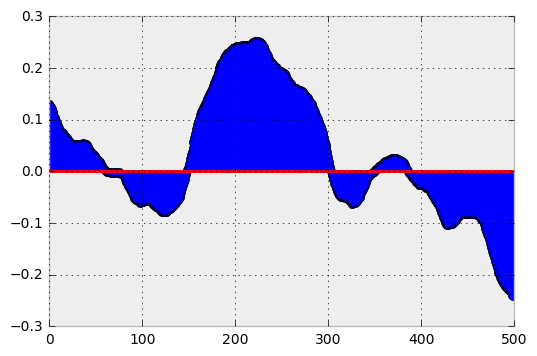

In [149]:
plt.stem(x[int(4.52*fs):int(4.52*fs)+500])

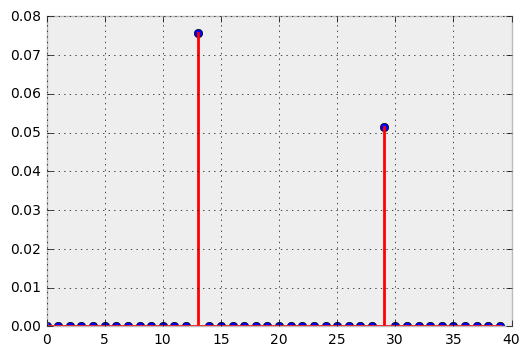

In [18]:
xs = np.zeros(x.shape)
xs[::16] = x[::16]
plt.stem(xs[int(4.52*fs):int(4.52*fs)+40], 'r')


Audio(xs, rate=fs)

<Container object of 3 artists>

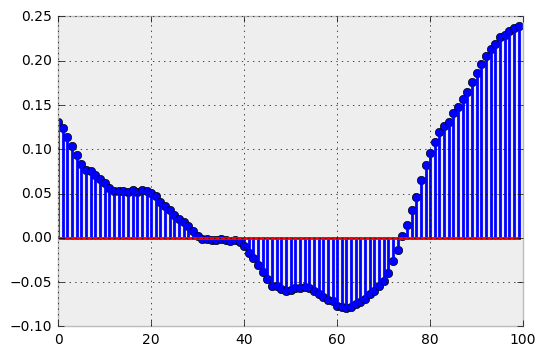

In [139]:
plt.stem(x[int(4.52*fs):int(4.52*fs)+200:2])

In [140]:
Audio(x[::2], rate=fs)

In [143]:
freq = 21000
n = np.arange(len(x))
tone = np.sin(2*np.pi*freq/fs * n)

Audio(tone, rate=fs)

In [144]:
# play the signal with the sine wave added

x_tone = x + tone

Audio(x_tone, rate=fs)

In [145]:
# play the downsampled signal with the sine wave added

Audio(x_tone[::2], rate=fs)

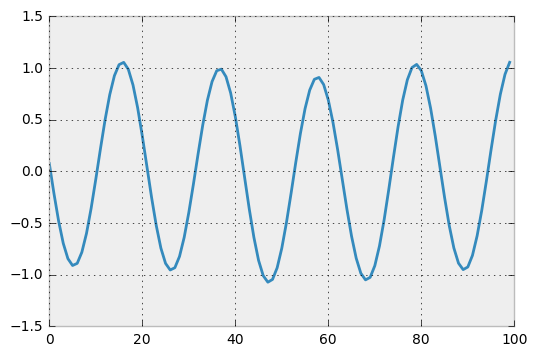

In [147]:
plt.plot(x_tone[fs:fs+200:2])

In [148]:
# remove the sinusoid

y = np.zeros(x.shape, dtype=np.complex128)
for k in range(1,len(x)):
    y[k] = x_tone[k] - np.exp(-1j*2*np.pi*freq/fs)*x_tone[k - 1]

z = np.zeros(x.shape, dtype=np.complex128)
for k in range(1,len(x)):
    z[k] = y[k] - np.exp(1j*2*np.pi*freq/fs)*y[k - 1]


Audio(z.real[::2], rate=fs/2)

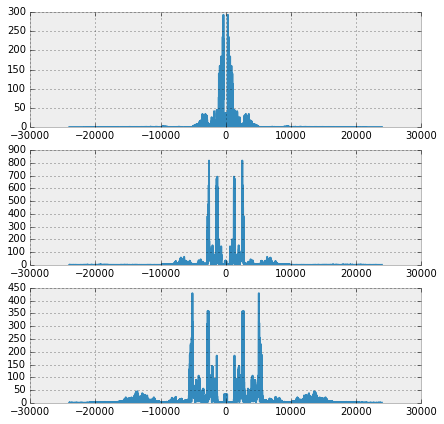

In [99]:
x_fast = x[::2]
x_faster = x[::4]

X = np.fft.fft(x, fs)
X_fast = np.fft.fft(x_fast, fs)
X_faster = np.fft.fft(x_faster, fs)

omega = np.arange(fs) - fs / 2.0

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(311)
plt.plot(omega, np.fft.fftshift(np.abs(X)))

ax = fig.add_subplot(312)
plt.plot(omega, np.fft.fftshift(np.abs(X_fast)))

ax = fig.add_subplot(313)
plt.plot(omega, np.fft.fftshift(np.abs(X_faster)))


In [76]:
# convolution

fs, h = wav.read('h-cathedral.wav')
print(fs)
fs, x = wav.read('can-one-hear-anechoic-normal.wav')
print(fs)

fsy, y = wav.read('singing.wav')
y = resample(y, int(len(y) * np.double(fs) / fsy))

h = np.double(h)
x = np.double(x)

x_conv_h = np.convolve(x, y)

44100
44100


/Users/doksa/anaconda3/anaconda/lib/python3.5/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [75]:
Audio(x_conv_h, rate=fs)